In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
random_state = 42

In [2]:
import sys
sys.path.append("..")
import scripts.data_utils as dutils

In [6]:
data = dutils.load_dataset_sample()
data

,text,fake
3300,"A video showing a smokenado, a tornado-shaped ...",0
11831,Photograph shows a breast rash caused by South...,1
14859,Pfizer CEO is still not vaccinated,1
88485,Steven Seagal receives Russian citizenship on ...,0
75581,Mitt Romney drove to Canada with the family do...,0
...,...,...
115563,Clinton's lead over Trump narrows to nine poin...,1
115482,Trump calls Democrats 'party of slavery' in mi...,1
19007,Prince William May Not Attend Royal Wedding Le...,1
38177,Russia's Putin says Trump behaves extravagantl...,0


#### lista modeli:
- Logit
- RF classifier
- XGBclassifier
- SVM
- CatBoost
- LGBM

In [ ]:
# !pip install catboost
# !pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 685.9 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.5 MB/s eta 0:00:00a 0:00:01


In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

## szybki test

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

In [ ]:
# ninja
lr = LogisticRegression(random_state=random_state)
rf = RandomForestClassifier(random_state=random_state)
svc = SVC(random_state=random_state)
xgb = XGBClassifier(random_state=random_state)
cat = CatBoostClassifier(random_state=random_state)
lgb = LGBMClassifier(random_state=random_state)

models = [("Logistic Regression", lr), ("Random Forest", rf), ("SVC", svc), ("XGBClassifier", xgb), ("CatBoost", cat), ("LGBM", lgb)]
X = data['text']
y = data['fake']

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
# vectorizer = TfidfVectorizer(ngram_range=(1, 3))
vectorizer.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print("Analyzing models for vecorizers with ngram range (1, 2) and max_features=5000")
# results_vectorizer_1_2_5000 = analyze_models(dict(models), vectorizer, X_train, X_test, y_train, y_test)

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }
    
    print(f"Model: {name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## glebsze testy

In [106]:
def analyze_models(models, vectorizer, X_train, X_test, y_train, y_test):
    results = {}
    X_train_vec = vectorizer.transform(X_train['text'])
    X_test_vec = vectorizer.transform(X_test['text'])
    
    for name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }
        
        print(f"Model: {name}")
        print(f"  Accuracy: {accuracy:.4f}")
        # print(classification_report(y_test, y_pred))
        # plt.figure(figsize=(6,4))
        # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        # plt.title(f'Confusion Matrix for {name}')
        # plt.xlabel('Predicted')
        # plt.ylabel('Actual')
        # plt.show()
        
    return results

In [107]:
def analyze_models_for_vectorizers(vectorizer, models=None, columnsX = ['text'], columny='fake'):
    if models is None:
        lr = LogisticRegression(random_state=random_state)
        rf = RandomForestClassifier(random_state=random_state)
        svc = SVC(random_state=random_state)
        xgb = XGBClassifier(random_state=random_state)
        cat = CatBoostClassifier(random_state=random_state)
        lgb = LGBMClassifier(random_state=random_state)
        models = [("Logistic Regression", lr), ("Random Forest", rf), ("SVC", svc), ("XGBClassifier", xgb), ("CatBoost", cat), ("LGBM", lgb)]

    X = data[columnsX]
    y = data[columny]

    vectorizer.fit(X['text'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    print("\n")
    print("================================")
    print(f"Analyzing models for vecorizers with ngram range {vectorizer.ngram_range} and max_features={vectorizer.max_features}, stop_words={vectorizer.stop_words}")
    print("================================")
    results = analyze_models(dict(models), vectorizer, X_train, X_test, y_train, y_test)
    return results

### sprawdzenie

In [123]:
vectorizer_all_3 = TfidfVectorizer(ngram_range=(1, 3))
vectorizer_all_2 = TfidfVectorizer(ngram_range=(1, 2))
vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
vectorizer_5000_2 = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

results_vectorizers = []
for vec in [vectorizer_all_3, vectorizer_all_2, vectorizer_5000_3, vectorizer_5000_2]:
    results = analyze_models_for_vectorizers(vec)
    results_vectorizers.append((vec, results))



Analyzing models for vecorizers with ngram range (1, 3) and max_features=None, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5588
Model: Random Forest
  Accuracy: 0.5415
Model: SVC
  Accuracy: 0.5575
Model: XGBClassifier
  Accuracy: 0.5657
Learning rate set to 0.033255
0:	learn: 0.6910684	total: 1.23s	remaining: 20m 33s
1:	learn: 0.6895749	total: 2.13s	remaining: 17m 41s
2:	learn: 0.6878364	total: 2.95s	remaining: 16m 19s
3:	learn: 0.6866359	total: 3.7s	remaining: 15m 20s
4:	learn: 0.6849131	total: 4.47s	remaining: 14m 48s
5:	learn: 0.6833281	total: 5.22s	remaining: 14m 24s
6:	learn: 0.6817577	total: 5.98s	remaining: 14m 8s
7:	learn: 0.6807620	total: 6.74s	remaining: 13m 56s
8:	learn: 0.6799888	total: 7.5s	remaining: 13m 45s
9:	learn: 0.6790116	total: 8.27s	remaining: 13m 38s
10:	learn: 0.6783095	total: 9.04s	remaining: 13m 32s
11:	learn: 0.6777426	total: 9.81s	remaining: 13m 27s
12:	learn: 0.6772277	total: 10.6s	remaining: 13m 24s
13:	learn: 0.6763089	total: 11.4s	remaini

================================
#### Analyzing models for vecorizers with ngram range (1, 3) and max_features=None
================================
- Model: Logistic Regression
  Accuracy: 0.5588
- Model: Random Forest
  Accuracy: 0.5415
- Model: SVC
  Accuracy: 0.5575
- Model: XGBClassifier
  Accuracy: 0.5657
- Model: CatBoost
  Accuracy: 0.5696
- Model: LGBM
  Accuracy: 0.5526


================================
#### Analyzing models for vecorizers with ngram range (1, 2) and max_features=None
================================
- Model: Logistic Regression
  Accuracy: 0.5603
- Model: Random Forest
  Accuracy: 0.5464
- Model: SVC
  Accuracy: 0.5559
- Model: XGBClassifier
  Accuracy: 0.5644
- Model: CatBoost
  Accuracy: 0.5611
- Model: LGBM
  Accuracy: 0.5618


================================
#### Analyzing models for vecorizers with ngram range (1, 3) and max_features=5000
================================
- Model: Logistic Regression
  Accuracy: 0.5773
- Model: Random Forest
  Accuracy: 0.5603
- Model: SVC
  Accuracy: 0.5531
- Model: XGBClassifier
  Accuracy: 0.5616
- Model: CatBoost
  Accuracy: 0.5683
- Model: LGBM
  Accuracy: 0.5621


================================
#### Analyzing models for vecorizers with ngram range (1, 2) and max_features=5000
================================
- Model: Logistic Regression
  Accuracy: 0.5752
- Model: Random Forest
  Accuracy: 0.5600
- Model: SVC
  Accuracy: 0.5513
- Model: XGBClassifier
  Accuracy: 0.5670
- Model: CatBoost
  Accuracy: 0.5680
- Model: LGBM
  Accuracy: 0.5721

wszystkie wyniki podobne, wezmy modele Logistic, RandomForest, i jakis booster. LGBM

In [124]:
lr = LogisticRegression(random_state=random_state)
rf = RandomForestClassifier(random_state=random_state)
lgb = LGBMClassifier(random_state=random_state)
models_to_analyze = [("Logistic Regression", lr), ("Random Forest", rf), ("LGBM", lgb)]

In [125]:
# sprawdze jeszcze to samo, ale ze stopwords
vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, stop_words='english')
vectorizer_5000_2 = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, stop_words='english')

results_vectorizers_stopwords = []
for vec in [vectorizer_5000_3, vectorizer_5000_2]:
    results = analyze_models_for_vectorizers(vec, models=models_to_analyze)
    results_vectorizers_stopwords.append((vec, results))



Analyzing models for vecorizers with ngram range (1, 3) and max_features=5000, stop_words=english
Model: Logistic Regression
  Accuracy: 0.5703
Model: Random Forest
  Accuracy: 0.5487
[LightGBM] [Info] Number of positive: 7774, number of negative: 7780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180306
[LightGBM] [Info] Number of data points in the train set: 15554, number of used features: 4942
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499807 -> initscore=-0.000772
[LightGBM] [Info] Start training from score -0.000772
Model: LGBM
  Accuracy: 0.5603


Analyzing models for vecorizers with ngram range (1, 2) and max_features=5000, stop_words=english
Model: Logistic Regression
  Accuracy: 0.5706
Model: Random Forest
  Accuracy: 0.5526
[LightGBM] [Info] Number of positive: 7774, number of negative: 7780
[LightGBM] [Info] Auto-choosing 

### metodka

In [80]:
# sprawdzę jak wygladaja fałszywe wyniki dla logistic regression.
def check_examples_of_misclassifications(model):
    X = data['text']
    y = data['fake']
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
    vectorizer.fit(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    results_df = pd.DataFrame({
        'text': X_test,
        'actual': y_test,
        'predicted': y_pred
    })

    fp_condition = (results_df['actual'] == 0) & (results_df['predicted'] == 1)
    false_positives = results_df[fp_condition]

    fn_condition = (results_df['actual'] == 1) & (results_df['predicted'] == 0)
    false_negatives = results_df[fn_condition]

    print(f"MODEL {model.__class__.__name__}")
    print("===================================")
    print(f"Znaleziono {len(false_positives)} FP.")
    print("Prawdziwe newsy uznane za fake:")
    print("===================================")

    # Użyj .values, żeby wyświetlić cały tekst bez skracania przez Pandas
    for text in false_positives['text'].head(10).values:
        print(f"- {text}")


    print("\n===================================")
    print(f"Znaleziono {len(false_negatives)} FN.")
    print("Fake newsy uznane za prawdziwe:")
    print("===================================")
    for text in false_negatives['text'].head(10).values:
        print(f"- {text}")


### takie tam

In [68]:
model = LogisticRegression(random_state=random_state)
check_examples_of_misclassifications(model)

MODEL LogisticRegression
Znaleziono 788 FP.
Prawdziwe newsy uznane za fake:
- Germany’s second biggest export market is China.
- China says South China Sea not an issue between China, United States BEIJING (Reuters) - The South China Sea was not an issue between China and the United States, and Washington is expected to make a positive contribution instead of stirring up trouble, Chinese Vice Foreign Minister Zheng Zeguang said on Friday. Zheng was speaking at a briefing about next week’s visit to China by U.S. President Donald Trump. 
- War crimes verdict on Mladic delayed as he undergoes blood test: Mladic son AMSTERDAM (Reuters) - The verdict in the war crimes trial of former Bosnian Serb military commander Ratko Mladic was delayed on Wednesday while he underwent a blood pressure test, his son Darko told Reuters. U.N. judges had ordered a five-minute bathroom break for Mladic, 74, before issuing their verdict in his trial for 11 alleged war crimes and crimes against humanity includi

In [69]:
model = RandomForestClassifier(random_state=random_state)
check_examples_of_misclassifications(model)

MODEL RandomForestClassifier
Znaleziono 734 FP.
Prawdziwe newsy uznane za fake:
- Germany’s second biggest export market is China.
- Says Jeff Brandes voted to allow state-run Citizens Property Insurance to dump policies onto out-of-state, unregulated private companies.
- COL RALPH PETERS: Obama and Politicians ‘Put Happiness of the Saudi Royal Family Above the Survivors of 9/11’ [Video] Colonel Ralph Peters comments on what he thinks Congress will do regarding releasing the 9/11 Report. Unfortunately, he s correct
- Says Marco Rubio would take away a womans right to choose for victims of rape or incest.
- PLAYING POLITICS? HERE’S WHY A JUDGE Will Unseal A Clinton Search Warrant [Video]
- WOW! VIDEO SURFACES OF BERNIE SANDERS Praising Communism And Bread Lines [Video] Please share this everywhere! Especially to anyone considering voting for this nut job!
- Macron expects casualties, after Hurricane Irma hits French territories PARIS (Reuters) - President Emmanuel Macron said on Wednesd

In [70]:
model = LGBMClassifier(random_state=random_state)
check_examples_of_misclassifications(model)

[LightGBM] [Info] Number of positive: 7774, number of negative: 7780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270150
[LightGBM] [Info] Number of data points in the train set: 15554, number of used features: 4997
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499807 -> initscore=-0.000772
[LightGBM] [Info] Start training from score -0.000772
MODEL LGBMClassifier
Znaleziono 785 FP.
Prawdziwe newsy uznane za fake:
- Germany’s second biggest export market is China.
- Says Jeff Brandes voted to allow state-run Citizens Property Insurance to dump policies onto out-of-state, unregulated private companies.
- Hilarious: What “Small Talk” Among Friends Looks Like at The Moment Pinterest Robert Gehl reports that Newt Gingrich has accused Fox News’ Megyn Kelly of being “fascinated” by sex, and not caring at all about public policy in a shocking an

In [85]:
# usune slowo Reuters, bo wystepuje w wielu newsach i moze zmylic model
u_data = data['text'].str.replace('Reuters', '', case=False)
u_data = u_data.str.replace('()', '', case=False)
data['text'] = u_data

In [86]:
lr = LogisticRegression(random_state=random_state)
rf = RandomForestClassifier(random_state=random_state)
lgb = LGBMClassifier(random_state=random_state)
models_to_analyze = [("Logistic Regression", lr), ("Random Forest", rf), ("LGBM", lgb)]

vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
vectorizer_5000_2 = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

results_vectorizers_stopwords = []
for vec in [vectorizer_5000_3, vectorizer_5000_2]:
    results = analyze_models_for_vectorizers(vec, models=models_to_analyze)
    results_vectorizers.append((vec, results))



Analyzing models for vecorizers with ngram range (1, 3) and max_features=5000, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5801
Model: Random Forest
  Accuracy: 0.5544
[LightGBM] [Info] Number of positive: 7774, number of negative: 7780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268860
[LightGBM] [Info] Number of data points in the train set: 15554, number of used features: 4997
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499807 -> initscore=-0.000772
[LightGBM] [Info] Start training from score -0.000772
Model: LGBM
  Accuracy: 0.5644


Analyzing models for vecorizers with ngram range (1, 2) and max_features=5000, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5768
Model: Random Forest
  Accuracy: 0.5546
[LightGBM] [Info] Number of positive: 7774,

to wyzej, wyniki po usunieciu (Reuters) wciaz są niezadowalające. niewielka zmiana
od teraz bede tylko dla Logistycznej regresji sprawdzac. bo jest szybkie

In [87]:
def check_misclassifications_all():
    models = [LogisticRegression(random_state=random_state),
              RandomForestClassifier(random_state=random_state),
              LGBMClassifier(random_state=random_state)
    ]
    for model in models:
        check_examples_of_misclassifications(model)

In [88]:
check_misclassifications_all()

MODEL LogisticRegression
Znaleziono 786 FP.
Prawdziwe newsy uznane za fake:
- Germany’s second biggest export market is China.
- China says South China Sea not an issue between China, United States BEIJING  - The South China Sea was not an issue between China and the United States, and Washington is expected to make a positive contribution instead of stirring up trouble, Chinese Vice Foreign Minister Zheng Zeguang said on Friday. Zheng was speaking at a briefing about next week’s visit to China by U.S. President Donald Trump. 
- War crimes verdict on Mladic delayed as he undergoes blood test: Mladic son AMSTERDAM  - The verdict in the war crimes trial of former Bosnian Serb military commander Ratko Mladic was delayed on Wednesday while he underwent a blood pressure test, his son Darko told . U.N. judges had ordered a five-minute bathroom break for Mladic, 74, before issuing their verdict in his trial for 11 alleged war crimes and crimes against humanity including genocide. That pause t

## analiza tylko dla LogisticRegression

i vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
bo szybciej

In [94]:
# wycinam wiecej informacji = agencja, [Video], [Image], 
data['text'] = data['text'].str.replace('[Video]', '')
data['text'] = data['text'].str.replace('[Image]', '')
vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
lr = LogisticRegression(random_state=random_state)

analyze_models_for_vectorizers(vectorizer_5000_3, models=[("Logistic Regression", lr)])

print("--------------------------------")
check_examples_of_misclassifications(lr)



Analyzing models for vecorizers with ngram range (1, 3) and max_features=5000, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5768
--------------------------------
MODEL LogisticRegression
Znaleziono 790 FP.
Prawdziwe newsy uznane za fake:
- Germany’s second biggest export market is China.
- China says South China Sea not an issue between China, United States BEIJING  - The South China Sea was not an issue between China and the United States, and Washington is expected to make a positive contribution instead of stirring up trouble, Chinese Vice Foreign Minister Zheng Zeguang said on Friday. Zheng was speaking at a briefing about next week’s visit to China by U.S. President Donald Trump. 
- War crimes verdict on Mladic delayed as he undergoes blood test: Mladic son AMSTERDAM  - The verdict in the war crimes trial of former Bosnian Serb military commander Ratko Mladic was delayed on Wednesday while he underwent a blood pressure test, his son Darko told . U.N. judges had order

In [95]:
# wyrzucę słowa pisane wielkimi literami powyzej 3 znakow - zeby nie bylo chwytliwych tytulow np "WATCH FIRST LADY"
import re
def remove_uppercase_long_words(text):
    return re.sub(r'\b[A-Z]{4,}\b', '', text)

data['text'] = data['text'].apply(remove_uppercase_long_words)

In [96]:
# dodam featurey
data['punctuation_ratio'] = data['text'].str.count(r'[!?,]') / (data['text'].str.len() + 1)
data['text_length'] = data['text'].str.len()


In [108]:
vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
lr = LogisticRegression(random_state=random_state)

analyze_models_for_vectorizers(vectorizer_5000_3,
                                models=[("Logistic Regression", lr)],
                                columnsX=["text", "punctuation_ratio", "text_length"])

print("--------------------------------")
check_examples_of_misclassifications(lr)



Analyzing models for vecorizers with ngram range (1, 3) and max_features=5000, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5775
--------------------------------
MODEL LogisticRegression
Znaleziono 798 FP.
Prawdziwe newsy uznane za fake:
- Germany’s second biggest export market is China.
- China says South China Sea not an issue between China, United States   - The South China Sea was not an issue between China and the United States, and Washington is expected to make a positive contribution instead of stirring up trouble, Chinese Vice Foreign Minister Zheng Zeguang said on Friday. Zheng was speaking at a briefing about next week’s visit to China by U.S. President Donald Trump. 
- War crimes verdict on Mladic delayed as he undergoes blood test: Mladic son   - The verdict in the war crimes trial of former Bosnian Serb military commander Ratko Mladic was delayed on Wednesday while he underwent a blood pressure test, his son Darko told . U.N. judges had ordered a five-minute

In [109]:
# teraz sprawdze inny wektorizer bardzo okrojony
vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=500)
lr = LogisticRegression(random_state=random_state)

analyze_models_for_vectorizers(vectorizer_5000_3, models=[("Logistic Regression", lr)], columnsX = ['text', 'punctuation_ratio', 'text_length'])

print("--------------------------------")
check_examples_of_misclassifications(lr)



Analyzing models for vecorizers with ngram range (1, 3) and max_features=500, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5698
--------------------------------
MODEL LogisticRegression
Znaleziono 798 FP.
Prawdziwe newsy uznane za fake:
- Germany’s second biggest export market is China.
- China says South China Sea not an issue between China, United States   - The South China Sea was not an issue between China and the United States, and Washington is expected to make a positive contribution instead of stirring up trouble, Chinese Vice Foreign Minister Zheng Zeguang said on Friday. Zheng was speaking at a briefing about next week’s visit to China by U.S. President Donald Trump. 
- War crimes verdict on Mladic delayed as he undergoes blood test: Mladic son   - The verdict in the war crimes trial of former Bosnian Serb military commander Ratko Mladic was delayed on Wednesday while he underwent a blood pressure test, his son Darko told . U.N. judges had ordered a five-minute 

In [110]:
vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=500)
lr = LogisticRegression(random_state=random_state)

analyze_models_for_vectorizers(vectorizer_5000_3, models=[("Logistic Regression", lr)])

print("--------------------------------")
check_examples_of_misclassifications(lr)



Analyzing models for vecorizers with ngram range (1, 3) and max_features=500, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5698
--------------------------------
MODEL LogisticRegression
Znaleziono 798 FP.
Prawdziwe newsy uznane za fake:
- Germany’s second biggest export market is China.
- China says South China Sea not an issue between China, United States   - The South China Sea was not an issue between China and the United States, and Washington is expected to make a positive contribution instead of stirring up trouble, Chinese Vice Foreign Minister Zheng Zeguang said on Friday. Zheng was speaking at a briefing about next week’s visit to China by U.S. President Donald Trump. 
- War crimes verdict on Mladic delayed as he undergoes blood test: Mladic son   - The verdict in the war crimes trial of former Bosnian Serb military commander Ratko Mladic was delayed on Wednesday while he underwent a blood pressure test, his son Darko told . U.N. judges had ordered a five-minute 

In [119]:
# min_df=5, max_df=0.9
vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=5, max_df=0.9)
lr = LogisticRegression(random_state=random_state, penalty='l2', C=0.1)

analyze_models_for_vectorizers(vectorizer_5000_3, models=[("Logistic Regression", lr)])

print("--------------------------------")
# check_examples_of_misclassifications(lr)



Analyzing models for vecorizers with ngram range (1, 3) and max_features=5000, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5971
--------------------------------


## czyste dane i tylko LogisticRegression

In [121]:
data = pd.read_csv('../data_for_modeling/dataset_sample_30_percent.csv')
data.head()

,text,fake
0,"A video showing a smokenado, a tornado-shaped ...",0
1,Photograph shows a breast rash caused by South...,1
2,Pfizer CEO is still not vaccinated,1
3,Steven Seagal receives Russian citizenship on ...,0
4,Mitt Romney drove to Canada with the family do...,0


In [ ]:
# min_df=5, max_df=0.9 - najlepszy wektorizer do tej pory
vectorizer_5000_3 = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=5, max_df=0.9)
lr = LogisticRegression(random_state=random_state, penalty='l2', C=0.1)

analyze_models_for_vectorizers(vectorizer_5000_3, models=[("Logistic Regression", lr)])

print("--------------------------------")
# check_examples_of_misclassifications(lr)



Analyzing models for vecorizers with ngram range (1, 3) and max_features=5000, stop_words=None
Model: Logistic Regression
  Accuracy: 0.5942
--------------------------------


to u gory, czyli po usunieciu reuters, wielkoliterowych slow itd jest ociupinkę lepiej. ale no nie ma znaczenia, bo nawet nie wyszlam > 60%

Rozpoczynam ręczne przeszukiwanie dla parametru 'C'...
  C = 0.01 : Dokładność treningowa = 0.5743, Dokładność testowa = 0.5593
  C = 0.1  : Dokładność treningowa = 0.6580, Dokładność testowa = 0.5948
  C = 1    : Dokładność treningowa = 0.7209, Dokładność testowa = 0.5804
  C = 10   : Dokładność treningowa = 0.7639, Dokładność testowa = 0.5549
  C = 100  : Dokładność treningowa = 0.7791, Dokładność testowa = 0.5464


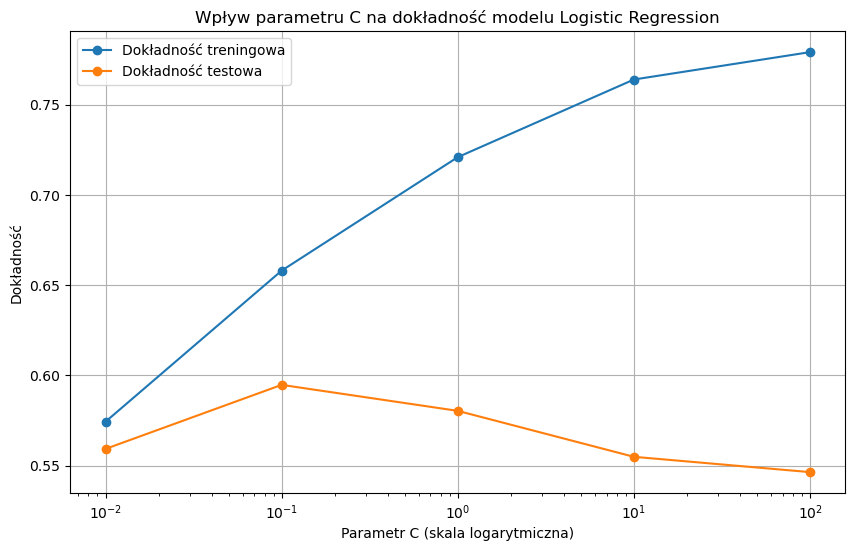

In [111]:
# od gem

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack 
import numpy as np
import matplotlib.pyplot as plt

# --- KROKI 1-5: Przygotowanie danych (tak jak w poprzedniej odpowiedzi) ---
# Załóżmy, że 'data' to Twoja ramka danych, a 'random_state' jest zdefiniowany

# Stwórz meta-cechy
data['punctuation_ratio'] = data['text'].str.count(r'[!?,]') / (data['text'].str.len() + 1e-6)
data['text_length'] = data['text'].str.len()
data.fillna(0, inplace=True)

# Podziel dane
X_train_df, X_test_df, y_train, y_test = train_test_split(
    data, data['fake'], test_size=0.2, random_state=random_state)

# Wektoryzuj tekst
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
vectorizer.fit(X_train_df['text'])
X_train_text_vec = vectorizer.transform(X_train_df['text'])
X_test_text_vec = vectorizer.transform(X_test_df['text'])

# Wyciągnij cechy numeryczne
numeric_features_train = X_train_df[['punctuation_ratio', 'text_length']].values
numeric_features_test = X_test_df[['punctuation_ratio', 'text_length']].values

# Połącz cechy
X_train_combined = hstack([X_train_text_vec, numeric_features_train])
X_test_combined = hstack([X_test_text_vec, numeric_features_test])


# --- KROK 6: Ręczne przeszukiwanie parametru 'C' z rysowaniem wykresu ---

# Lista wartości C, które chcemy przetestować. Używamy skali logarytmicznej.
C_values = [0.01, 0.1, 1, 10, 100]
train_accuracies = []
test_accuracies = []

print("Rozpoczynam ręczne przeszukiwanie dla parametru 'C'...")

for c_val in C_values:
    # Tworzymy model z konkretną wartością C
    # Używamy solver='liblinear', bo dobrze radzi sobie z takimi danymi
    lr_model = LogisticRegression(C=c_val, random_state=random_state, max_iter=1000, solver='liblinear')
    
    # Trenujemy model
    lr_model.fit(X_train_combined, y_train)
    
    # Sprawdzamy dokładność na zbiorze TRENINGOWYM (żeby zobaczyć, czy nie ma overfittingu)
    train_pred = lr_model.predict(X_train_combined)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    
    # Sprawdzamy dokładność na zbiorze TESTOWYM (to jest nasz główny wskaźnik)
    test_pred = lr_model.predict(X_test_combined)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)
    
    print(f"  C = {c_val:<5}: Dokładność treningowa = {train_acc:.4f}, Dokładność testowa = {test_acc:.4f}")

# --- KROK 7: Rysowanie wykresu ---

plt.figure(figsize=(10, 6))
# Używamy skali logarytmicznej dla osi X, bo nasze C tak rosną
plt.semilogx(C_values, train_accuracies, 'o-', label='Dokładność treningowa')
plt.semilogx(C_values, test_accuracies, 'o-', label='Dokładność testowa')
plt.title('Wpływ parametru C na dokładność modelu Logistic Regression')
plt.xlabel('Parametr C (skala logarytmiczna)')
plt.ylabel('Dokładność')
plt.grid(True)
plt.legend()
plt.show()